In [76]:
# 24년 12월 2일
# commit 한 사람: 오주영
# 디아고스티노-피어슨 검정 추가, 코드 수정
# 정규성 판단 추가

In [77]:
import pandas as pd

df_train = pd.read_csv("FIFA_train.csv")
df_test = pd.read_csv("FIFA_test.csv")
df = pd.concat([df_train, df_test], ignore_index=True)

left_foot = df[df["prefer_foot"] == "left"]
right_foot = df[df["prefer_foot"] == "right"]


# 데이터 합치기
df = pd.concat([df_train, df_test], ignore_index=True)

In [78]:
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [79]:
#plt그리기 위해 나눠 봤습니다
left_foot = df[df["prefer_foot"] == "left"]
right_foot = df[df["prefer_foot"] == "right"]

In [80]:
#전체 행 갯수는
total_rows = print(len(df)) # 전체
left_foot_rows = print(len(left_foot))  #왼발 그룹!
right_foot_rows = print(len(right_foot))  #오른발 그룹!

12760
3008
9752


In [81]:
left_footed_values = left_foot['stat_overall']
right_footed_values = right_foot['stat_overall']

In [82]:
from scipy.stats import normaltest

# 예제 데이터 
data1 = right_footed_values

# D'Agostino and Pearson's Test
stat1, p_value1 = normaltest(data1)

# 결과 출력
print(f"D'Agostino and Pearson's Test statistic: {stat1:.4f}")
print(f"P-value: {p_value1:.4f}")

if p_value1 > 0.05:
    print("정규성을 기각할 수 없습니다. 데이터가 정규분포를 따릅니다.")
else:
    print("정규성을 기각합니다. 데이터가 정규분포를 따르지 않습니다.")


D'Agostino and Pearson's Test statistic: 5.2076
P-value: 0.0740
정규성을 기각할 수 없습니다. 데이터가 정규분포를 따릅니다.


In [83]:
from scipy.stats import normaltest

# 예제 데이터 
data2 = left_footed_values

# D'Agostino and Pearson's Test
stat2, p_value2 = normaltest(data2)

# 결과 출력
print(f"D'Agostino and Pearson's Test statistic: {stat2:.4f}")
print(f"P-value: {p_value2:.4f}")

if p_value2 > 0.05:
    print("정규성을 기각할 수 없습니다. 데이터가 정규분포를 따릅니다.")
else:
    print("정규성을 기각합니다. 데이터가 정규분포를 따르지 않습니다.")


D'Agostino and Pearson's Test statistic: 19.3099
P-value: 0.0001
정규성을 기각합니다. 데이터가 정규분포를 따르지 않습니다.


정규성 판단 종합하기:
**시각적 검토(Q-Q 플롯, 히스토그램)**와 다수의 검정 결과를 종합적으로 고려합니다.
정규성 검정에서의 상충되는 결과는 주로 샘플 크기와 검정의 민감성 차이로 인해 발생할 수 있습니다.

결론적으로, 정규성 검정 결과가 상충될 때는:
데이터가 시각적(히스토그램, Q-Q플롯)으로 정규분포를 따르는 것으로 보인다면, 실제로 정규분포에 가깝다고 판단할 수 있습니다.
Anderson-Darling Test나 Shapiro-Wilk Test에서 기각된다 하더라도, 검정이 민감한 경우일 수 있기 때문에 이를 지나치게 신뢰하지 않고 다수의 결과를 종합적으로 판단하는 것이 좋습니다.
D'Agostino and Pearson's Test에서 정규성을 따른다고 나왔다면, 첨도와 왜도가 정규분포에 맞는다는 것을 의미하므로 데이터가 정규분포에 가까운 것으로 해석할 수 있습니다.

Jarque-Bera Test와 D'Agostino and Pearson's Test의 차이점

Jarque-Bera Test는 왜도와 첨도에 민감하게 반응하는 반면, D'Agostino and Pearson's Test는 왜도와 첨도의 변환된 값에 기반해 더 강력한 정규성 검정을 제공합니다.
D'Agostino and Pearson's Test는 샘플 크기가 큰 데이터에서 더 유효하며, Jarque-Bera Test는 상대적으로 작은 샘플에서 더 민감할 수 있습니다.

이 부분은 그냥 참고용으로 봐주세요.
1. QQ 플롯과 히스토그램
시각적 검토는 주관적인 해석을 포함할 수 있지만, 직선에 가까운 Q-Q 플롯과 정규분포 형태의 히스토그램은 정규성을 시각적으로 잘 따르는 경우를 보여줍니다.
시각적으로 정규성을 따른다고 판단되는 경우, 다른 검정 방법에서도 그와 일치하는 결과가 나오면 신뢰도가 높아집니다.
2. D'Agostino and Pearson's Test
D'Agostino and Pearson's Test는 왜도와 첨도에 기반하여 정규성 여부를 검정합니다.
이 검정은 특히 샘플 크기가 클 때 유효하며, 정규성을 따르는 결과를 보였다면, 해당 결과는 유효할 수 있습니다.
3. Anderson-Darling Test
Anderson-Darling Test는 매우 강력한 정규성 검정 방법으로, 샘플 크기에 관계없이 잘 작동합니다. 이 검정에서 정규성을 기각하는 결과가 나왔다면, 이는 정규성에 대한 반박으로 해석할 수 있습니다.
4. Shapiro-Wilk Test
Shapiro-Wilk Test는 작은 샘플에서 효과적인 방법으로 알려져 있으며, 샘플 크기가 크다면 정규성을 기각하는 경향이 있습니다. 그러나 큰 샘플에서는 정규성 기각이 매우 민감할 수 있기 때문에 결과에 유의해야 합니다.
5. Jarque-Bera Test
Jarque-Bera Test는 왜도와 첨도를 기반으로 정규성 검정을 수행합니다. 이 검정에서 정규성을 기각한다면, 데이터의 왜도나 첨도가 정규분포와 차이를 보인다고 해석할 수 있습니다.


In [84]:
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats as stats

# # 예제 데이터 생성
# data = np.append(data1, [10, -10])   # 이상치 추가

# # 히스토그램과 Q-Q Plot
# plt.figure(figsize=(12, 6))

# # 히스토그램
# plt.subplot(1, 2, 1)
# plt.hist(data1, bins=20, alpha=0.7, color='blue', edgecolor='black')
# plt.title("Histogram")

# # Q-Q Plot
# plt.subplot(1, 2, 2)
# stats.probplot(data1, dist="norm", plot=plt)
# plt.title("Q-Q Plot")

# plt.tight_layout()
# plt.show()


In [85]:
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats as stats

# # 예제 데이터 생성 (정규분포 + 이상치 추가)  # 정규분포 데이터
# data4 = np.append(data1, [10, -10])   # 이상치 추가

# # 1. IQR 계산
# q1 = np.percentile(data4, 25)  # 1사분위
# q3 = np.percentile(data4, 75)  # 3사분위
# iqr = q3 - q1                 # IQR

# # 이상치 기준 계산
# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr

# # 이상치 제거
# filtered_data = data4[(data4 >= lower_bound) & (data4 <= upper_bound)]

# print(f"IQR 범위: [{lower_bound:.2f}, {upper_bound:.2f}]")
# print(f"제거 전 데이터 개수: {len(data4)}, 제거 후 데이터 개수: {len(filtered_data)}")


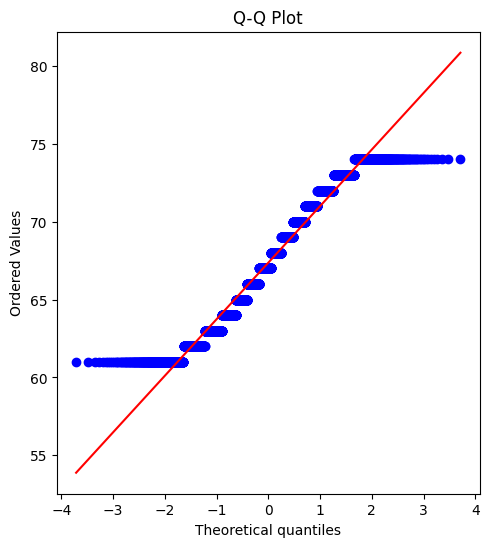

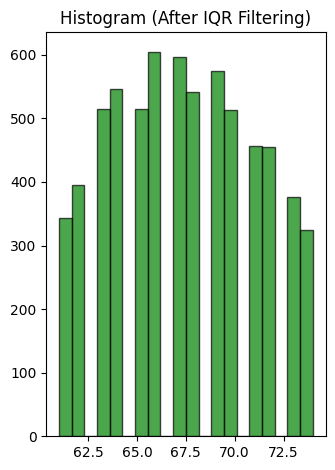

IQR 범위: [60.30, 74.70]
제거 전 데이터 개수: 9752, 제거 후 데이터 개수: 6758


In [86]:
import numpy as np
import matplotlib.pyplot as plt

# 예제 데이터 생성 (정규분포 + 이상치 추가)
data = data1
# 1. IQR 계산
q1 = np.percentile(data, 25)  # 1사분위
q3 = np.percentile(data, 75)  # 3사분위
iqr = q3 - q1                 # IQR

# 이상치 기준 계산
lower_bound = q1 - 0.3 * iqr
upper_bound = q3 + 0.3 * iqr

# 이상치 제거
filtered_data = data[(data1 >= lower_bound) & (data <= upper_bound)]

# 2. Q-Q Plot: IQR 필터링 후 데이터의 정규성 확인
plt.figure(figsize=(12, 6))

# Q-Q Plot
plt.subplot(1, 2, 1)
stats.probplot(filtered_data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# 히스토그램
plt.subplot(1, 2, 2)
plt.hist(filtered_data, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title("Histogram (After IQR Filtering)")

plt.tight_layout()
plt.show()

# IQR 범위 출력
print(f"IQR 범위: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"제거 전 데이터 개수: {len(data)}, 제거 후 데이터 개수: {len(filtered_data)}")


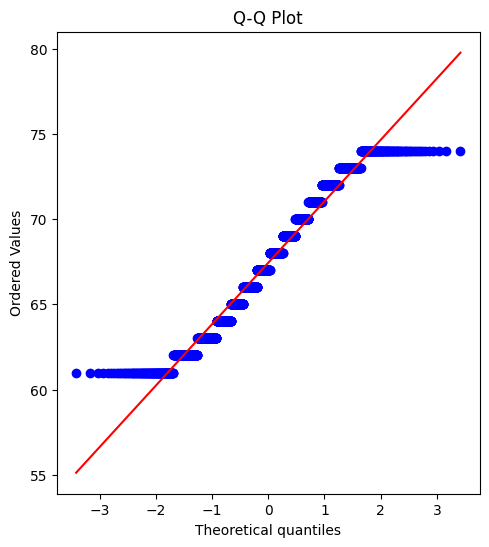

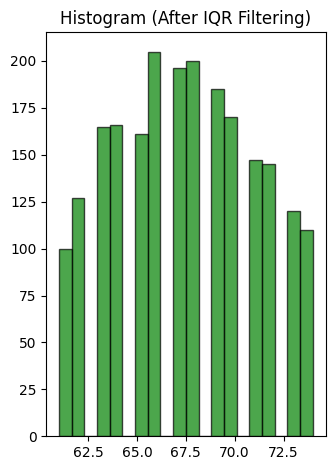

IQR 범위: [60.30, 74.70]
제거 전 데이터 개수: 3008, 제거 후 데이터 개수: 2197


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 예제 데이터 생성 (정규분포 + 이상치 추가)
dataset = data2

# 1. IQR 계산
first_quartile = np.percentile(dataset, 25)  # 1사분위수
third_quartile = np.percentile(dataset, 75)  # 3사분위수
interquartile_range = third_quartile - first_quartile  # IQR

# 이상치 기준 계산
lower_threshold = first_quartile - 0.3 * interquartile_range
upper_threshold = third_quartile + 0.3 * interquartile_range

# 이상치 제거
cleaned_dataset = dataset[(dataset >= lower_threshold) & (dataset <= upper_threshold)]

# 2. Q-Q Plot: IQR 필터링 후 데이터의 정규성 확인
plt.figure(figsize=(12, 6))

# Q-Q Plot
plt.subplot(1, 2, 1)
stats.probplot(cleaned_dataset, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# 히스토그램
plt.subplot(1, 2, 2)
plt.hist(cleaned_dataset, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title("Histogram (After IQR Filtering)")

plt.tight_layout()
plt.show()

# IQR 범위 출력
print(f"IQR 범위: [{lower_threshold:.2f}, {upper_threshold:.2f}]")
print(f"제거 전 데이터 개수: {len(dataset)}, 제거 후 데이터 개수: {len(cleaned_dataset)}")


샤피로 검정(Shapiro-Wilk Test), KS 검정(Kolmogorov-Smirnov Test), 그리고 앤더슨-달링 검정(Anderson-Darling Test) 모두 데이터가 정규분포를 따르는지 확인하는 통계적 검정 방법입니다. 이 세 가지 검정에서 모두 정규성을 띄지 않는다고 나왔다면, 데이터는 정규분포를 따르지 않는다고 결론을 내릴 수 있습니다.

Q-Q Plot이 정규성을 띄지 않는 모양을 보이고, 위 세 가지 정규성 검정 결과 모두 정규성을 거부했다면, 해당 데이터는 정규분포를 따르지 않는다고 확신할 수 있습니다.

이 경우 정규성 가정을 요구하는 통계적 분석(예: 선형 회귀 등)을 진행하기 전에 비모수적 방법을 사용하는 것이 좋습니다. 예를 들어, 회귀 분석에서는 선형 회귀 대신 로지스틱 회귀나 결정 트리 회귀와 같은 비선형 모델을 고려할 수 있습니다.